In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from tabnet.estimator import TabNetClassifier
from tabnet.utils.logger import init_logger

In [3]:
logger_dir = 'logs'
logger_name = 'Representation on Robots Data(ACIEX1009R_Z1_20191127_20200227)'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## Load data

In [4]:
# raw_data = pd.read_csv('D:/data/TabNet samples/robots/ACIEX1009R_Z1_20191127_20200227.csv')

# series_data = list(raw_data.groupby('STARTTIME'))
# print('Sample size : ', len(series_data))

## Prepare data

In [5]:
# from scipy.stats import skew, kurtosis

# SRCS = ['SPEED', 'TORQUE']

# stats = {}

# for i in range(len(series_data)):
#     print('processing index : {}'.format(i))
#     data = series_data[i][1]
    
#     gp = data.groupby('STEP_NAME')[['SPEED', 'TORQUE']]
    
#     if len(gp) < 3: 
#         continue

#     try:
#         # all
#         for src in SRCS:
#             stats.setdefault(str(src) + '_' + 'mean', []).append(np.mean(data[src]))
#             stats.setdefault(str(src) + '_' + 'std', []).append(np.std(data[src]))
#             stats.setdefault(str(src) + '_' + 'max', []).append(np.max(data[src]))
#             stats.setdefault(str(src) + '_' + 'min', []).append(np.min(data[src]))
#             stats.setdefault(str(src) + '_' + 'skew', []).append(skew(data[src]))
#             stats.setdefault(str(src) + '_' + 'kurtosis', []).append(kurtosis(data[src]))
            
#         # step
#         gp_mean = gp.apply(np.mean)
#         gp_std = gp.apply(np.std)
#         gp_max = gp.apply(np.max)
#         gp_min = gp.apply(np.min)
# #         gp_skew = gp.apply(skew)
# #         gp_kurtosis = gp.apply(kurtosis)
        
#         for src in SRCS:
#             for step in [0, 1, 2]:
#                 stats.setdefault(str(src) + '_' + 'step_' + str(step) + '_mean', []).\
#                     append(gp_mean.iloc[step, :][src])
                
#                 stats.setdefault(str(src) + '_' + 'step_' + str(step) + '_std', []).\
#                     append(gp_std.iloc[step, :][src])
                
#                 stats.setdefault(str(src) + '_' + 'step_' + str(step) + '_max', []).\
#                     append(gp_max.iloc[step, :][src])
                
#                 stats.setdefault(str(src) + '_' + 'step_' + str(step) + '_min', []).\
#                     append(gp_min.iloc[step, :][src])
        
#         for step in [0, 1, 2]:
#             stats.setdefault('step_' + str(step) + '_corr', []).\
#                 append(np.corrcoef(gp.get_group(step)['SPEED'], gp.get_group(step)['TORQUE'])[0, 1])
 

#     except Exception as e:
#         print('failed')
#         print(e)
        


In [6]:
# training_data = pd.DataFrame(stats)

# training_data

In [7]:
# # training_data.to_csv('ACIEX1009R_Z1_20191127_20200227_processed.csv')
training_data = pd.read_csv('ACIEX1009R_Z1_20191127_20200227_processed.csv').drop('Unnamed: 0', axis=1).fillna(0)
training_data

,SPEED_mean,SPEED_std,SPEED_max,SPEED_min,SPEED_skew,SPEED_kurtosis,TORQUE_mean,TORQUE_std,TORQUE_max,TORQUE_min,...,TORQUE_step_1_std,TORQUE_step_1_max,TORQUE_step_1_min,TORQUE_step_2_mean,TORQUE_step_2_std,TORQUE_step_2_max,TORQUE_step_2_min,step_0_corr,step_1_corr,step_2_corr
0,39.875000,17.608148,67,5,-0.130890,-1.065550,477.109375,42.659670,556,398,...,38.716601,556,421,466.318182,40.091244,533,398,0.712781,0.139390,0.457074
1,-65.329545,28.061103,-5,-89,0.886115,-0.743660,305.562500,28.781634,380,228,...,26.452881,351,240,327.081081,22.695848,380,287,0.364805,-0.151304,0.135437
2,-29.917647,12.605519,-5,-50,0.093354,-1.131026,307.670588,31.624409,392,240,...,35.921573,392,257,312.192982,29.097802,369,246,-0.514539,-0.058624,0.208219
3,76.606667,35.961256,111,5,-0.643013,-1.103737,507.293333,50.913331,603,392,...,31.502125,603,480,457.666667,40.513764,579,392,0.811073,-0.249426,0.679215
4,40.444444,17.226574,67,5,-0.105461,-1.103224,477.349206,45.975203,568,386,...,37.686177,544,415,466.045455,44.104707,550,386,0.680593,-0.053754,0.359817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113180,75.743421,36.641668,111,5,-0.618529,-1.144499,561.269737,51.316609,661,433,...,29.594757,661,533,507.047619,39.446137,632,433,0.696217,-0.242541,0.759852
113181,40.460317,17.067397,67,6,-0.126545,-1.084159,527.873016,40.683249,609,427,...,32.314058,609,480,514.772727,38.025030,603,427,0.339970,0.111981,0.616984
113182,-65.338983,28.520947,-5,-89,0.873852,-0.771312,221.412429,27.307300,292,164,...,26.367288,287,164,232.243243,23.630495,281,187,0.134929,-0.021765,0.107159
113183,-29.807229,12.291105,-5,-50,0.068441,-1.122918,199.385542,25.772326,251,134,...,26.314207,251,158,200.089286,26.487380,251,134,0.064257,0.059718,0.019409


In [8]:
sum(training_data.step_2_corr.map(lambda x: isinstance(x, float))) == len(training_data)

True

In [9]:
training_data['TORQUE_kurtosis']
sum(training_data.TORQUE_skew.map(lambda x: isinstance(x, float))) == len(training_data)

True

In [10]:
# del tabnet_classifier 

## Init estimator

In [11]:
tabnet_classifier = TabNetClassifier(
    input_dims=39, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=8, atten_dims=8, num_steps=4, num_indep=2, num_shared=1, 
    virtual_batch_size=256, batch_size=1024
)

tabnet_classifier.build(path=None)

[2021-02-22 00:22:20,310][WARNING][TabNet] Failed to load model from None


TabNetClassifier(input_dims=39, is_cuda=True, logger=<RootLogger root (INFO)>,
                 num_shared=1, num_steps=4, output_dims=[1],
                 virtual_batch_size=256)

## Setup training parameters

In [12]:
from torch.optim import Adam
from torch.optim import lr_scheduler

training_params = {
    'batch_size': 2048,
    'max_epochs': 100,
    'optimizer': Adam,
    'optimizer_params': {'lr': 0.3},
    'schedulers': [lr_scheduler.ExponentialLR],
    'scheduler_params': {'gamma': 0.99}
}

## Start training

In [13]:
# cols = ['step_0_corr', 'step_1_corr','step_2_corr']

tabnet_classifier.pretrain(training_data.values, **training_params)

[2021-02-22 00:22:20,365][INFO][TabNet] Convert to pretrain model.
[2021-02-22 00:22:20,371][INFO][TabNet] start training.
[2021-02-22 00:22:20,372][INFO][TabNet] ******************** epoch : 0 ********************
[2021-02-22 00:22:32,414][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:22:32,416][INFO][TabNet] total_loss : 2.4919561180201444
[2021-02-22 00:22:32,417][INFO][TabNet] task_loss : 2.4917510639537466
[2021-02-22 00:22:32,418][INFO][TabNet] mask_loss : -0.2050573435019363
[2021-02-22 00:22:32,419][INFO][TabNet] time_cost : 7.896837
[2021-02-22 00:22:32,420][INFO][TabNet] ******************** epoch : 1 ********************
[2021-02-22 00:22:43,606][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:22:43,607][INFO][TabNet] total_loss : 0.41924536472017115
[2021-02-22 00:22:43,607][INFO][TabNet] task_loss : 0.4191841567104513
[2021-02-22 00:22:43,608][INFO][TabNet] mask_loss : -0.0612071920524944
[2021-02-22 00:

[2021-02-22 00:25:45,532][INFO][TabNet] total_loss : 0.1262418581680818
[2021-02-22 00:25:45,533][INFO][TabNet] task_loss : 0.12622106739065864
[2021-02-22 00:25:45,534][INFO][TabNet] mask_loss : -0.020790873129259455
[2021-02-22 00:25:45,534][INFO][TabNet] time_cost : 7.788059
[2021-02-22 00:25:45,535][INFO][TabNet] ******************** epoch : 18 ********************
[2021-02-22 00:25:58,124][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:25:58,125][INFO][TabNet] total_loss : 0.12887854101982985
[2021-02-22 00:25:58,126][INFO][TabNet] task_loss : 0.12884997752579777
[2021-02-22 00:25:58,126][INFO][TabNet] mask_loss : -0.02856360287828879
[2021-02-22 00:25:58,127][INFO][TabNet] time_cost : 8.058045
[2021-02-22 00:25:58,128][INFO][TabNet] ******************** epoch : 19 ********************
[2021-02-22 00:26:10,739][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:26:10,740][INFO][TabNet] total_loss : 0.136567426947030

[2021-02-22 00:29:15,556][INFO][TabNet] ******************** epoch : 35 ********************
[2021-02-22 00:29:28,059][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:29:28,060][INFO][TabNet] total_loss : 0.1082327277822928
[2021-02-22 00:29:28,061][INFO][TabNet] task_loss : 0.10822368426756425
[2021-02-22 00:29:28,062][INFO][TabNet] mask_loss : -0.00904382024468346
[2021-02-22 00:29:28,062][INFO][TabNet] time_cost : 7.991834999999999
[2021-02-22 00:29:28,063][INFO][TabNet] ******************** epoch : 36 ********************
[2021-02-22 00:29:40,464][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:29:40,465][INFO][TabNet] total_loss : 0.10972042639147152
[2021-02-22 00:29:40,465][INFO][TabNet] task_loss : 0.10971742922609502
[2021-02-22 00:29:40,466][INFO][TabNet] mask_loss : -0.002996626307933845
[2021-02-22 00:29:40,467][INFO][TabNet] time_cost : 7.942785999999999
[2021-02-22 00:29:40,467][INFO][TabNet] ************

[2021-02-22 00:32:57,723][INFO][TabNet] total_loss : 0.11393405903469432
[2021-02-22 00:32:57,724][INFO][TabNet] task_loss : 0.11393178742040287
[2021-02-22 00:32:57,724][INFO][TabNet] mask_loss : -0.0022712528229352426
[2021-02-22 00:32:57,725][INFO][TabNet] time_cost : 7.816394000000001
[2021-02-22 00:32:57,726][INFO][TabNet] ******************** epoch : 53 ********************
[2021-02-22 00:33:10,028][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:33:10,029][INFO][TabNet] total_loss : 0.12116646793755619
[2021-02-22 00:33:10,029][INFO][TabNet] task_loss : 0.12116398946805433
[2021-02-22 00:33:10,030][INFO][TabNet] mask_loss : -0.00247925484277816
[2021-02-22 00:33:10,031][INFO][TabNet] time_cost : 7.842639
[2021-02-22 00:33:10,031][INFO][TabNet] ******************** epoch : 54 ********************
[2021-02-22 00:33:22,467][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:33:22,468][INFO][TabNet] total_loss : 0.1102

[2021-02-22 00:36:26,886][INFO][TabNet] time_cost : 7.961813
[2021-02-22 00:36:26,886][INFO][TabNet] ******************** epoch : 70 ********************
[2021-02-22 00:36:38,989][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:36:38,990][INFO][TabNet] total_loss : 0.11172326870939948
[2021-02-22 00:36:38,991][INFO][TabNet] task_loss : 0.11172069229862906
[2021-02-22 00:36:38,991][INFO][TabNet] mask_loss : -0.0025762167579325085
[2021-02-22 00:36:38,992][INFO][TabNet] time_cost : 7.638885999999999
[2021-02-22 00:36:38,993][INFO][TabNet] ******************** epoch : 71 ********************
[2021-02-22 00:36:50,863][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:36:50,864][INFO][TabNet] total_loss : 0.1083988444371657
[2021-02-22 00:36:50,864][INFO][TabNet] task_loss : 0.10839654491706328
[2021-02-22 00:36:50,865][INFO][TabNet] mask_loss : -0.0022995012082074853
[2021-02-22 00:36:50,865][INFO][TabNet] time_cost : 7.7719

[2021-02-22 00:40:08,079][INFO][TabNet] total_loss : 0.10937058302489194
[2021-02-22 00:40:08,080][INFO][TabNet] task_loss : 0.10936839079315012
[2021-02-22 00:40:08,080][INFO][TabNet] mask_loss : -0.002192053022074767
[2021-02-22 00:40:08,081][INFO][TabNet] time_cost : 7.981671999999999
[2021-02-22 00:40:08,082][INFO][TabNet] ******************** epoch : 88 ********************
[2021-02-22 00:40:20,330][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:40:20,331][INFO][TabNet] total_loss : 0.10393194271759554
[2021-02-22 00:40:20,331][INFO][TabNet] task_loss : 0.10393075292760676
[2021-02-22 00:40:20,332][INFO][TabNet] mask_loss : -0.0011898600110064514
[2021-02-22 00:40:20,333][INFO][TabNet] time_cost : 7.809776
[2021-02-22 00:40:20,333][INFO][TabNet] ******************** epoch : 89 ********************
[2021-02-22 00:40:32,736][INFO][TabNet] -------------------- train info --------------------
[2021-02-22 00:40:32,737][INFO][TabNet] total_loss : 0.102

TabNetClassifier(batch_size=2048, input_dims=39, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_shared=1, num_steps=4,
                 output_dims=[1], virtual_batch_size=256)

In [14]:
# training_params = {
#     'batch_size': 2048,
#     'max_epochs': 50,
#     'optimizer': Adam,
#     'optimizer_params': {'lr': 0.05},
#     'schedulers': [lr_scheduler.ExponentialLR],
#     'scheduler_params': {'gamma': 0.99}
# }

# tabnet_classifier.pretrain(training_data.values, **training_params)

## Extract feature representation

In [15]:
reprs = tabnet_classifier.extract(training_data)

## K-Means with Elbow Method

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

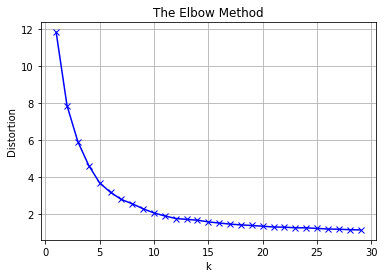

In [35]:
distortions = []
K = range(1, 30)

for k in K:
    km = KMeans(n_clusters=k).fit(reprs)
    distortions.append(sum(np.min(cdist(reprs, km.cluster_centers_, 'euclidean'), axis=1)) / training_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.grid()
plt.show()

## Visualization

In [18]:
from sklearn.manifold import TSNE  
from mpl_toolkits.mplot3d import Axes3D

In [19]:
map_vir = plt.cm.get_cmap(name='jet')
color = map_vir(np.linspace(0, 1, reprs.shape[0]))

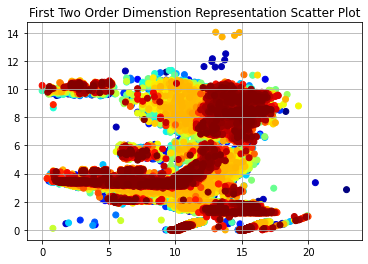

In [20]:
plt.scatter(reprs[:, 0], reprs[:, 1], color=color)
# plt.scatter(reprs[:, 0], reprs[:, 1], color='b')
plt.title('First Two Order Dimenstion Representation Scatter Plot')
plt.grid()

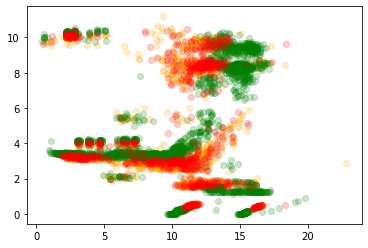

In [57]:
plt.scatter(reprs[:2000, 0], reprs[:2000, 1], color='orange', alpha=0.2)
plt.scatter(reprs[110000:, 0], reprs[110000:, 1], color='g', alpha=0.2)
plt.scatter(reprs[60000:61000, 0], reprs[60000:61000, 1], color='r', alpha=0.2)

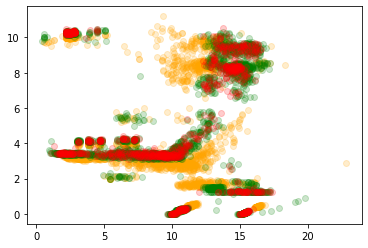

In [72]:
plt.scatter(reprs[:2000, 0], reprs[:2000, 1], color='orange', alpha=0.2)
plt.scatter(reprs[110000:, 0], reprs[110000:, 1], color='g', alpha=0.2)
plt.scatter(reprs[86000:87000, 0], reprs[86000:87000, 1], color='r', alpha=0.2)

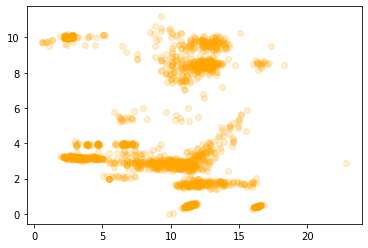

In [53]:
plt.scatter(reprs[:2000, 0], reprs[:2000, 1], color='orange', alpha=0.2)

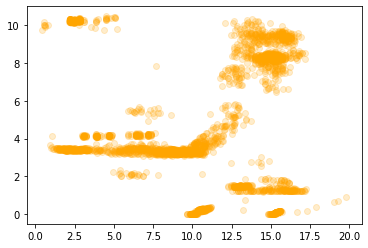

In [51]:
plt.scatter(reprs[110000:, 0], reprs[110000:, 1], color='orange', alpha=0.2)

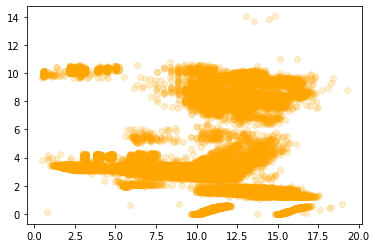

In [39]:
plt.scatter(reprs[60000:90000, 0], reprs[60000:90000, 1], color='orange', alpha=0.2)

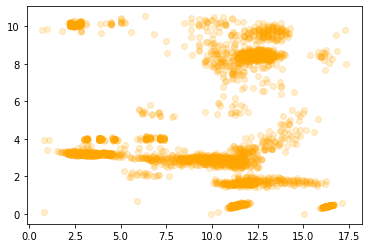

In [44]:
plt.scatter(reprs[65000:68000, 0], reprs[65000:68000, 1], color='orange', alpha=0.2)

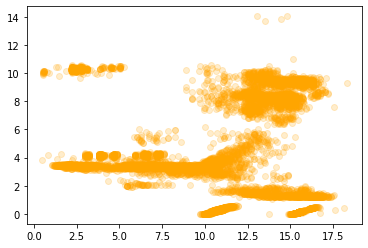

In [40]:
plt.scatter(reprs[80000:90000, 0], reprs[80000:90000, 1], color='orange', alpha=0.2)

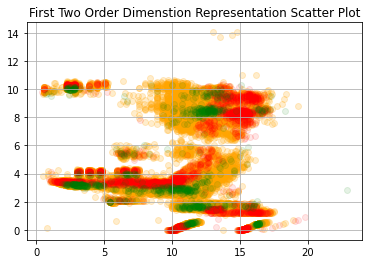

In [38]:
plt.scatter(reprs[60000:90000, 0], reprs[60000:90000, 1], color='orange', alpha=0.2)
plt.scatter(reprs[110000:, 0], reprs[110000:, 1], color='r', alpha=0.1)
plt.scatter(reprs[:1000, 0], reprs[:1000, 1], color='g', alpha=0.1)
plt.title('First Two Order Dimenstion Representation Scatter Plot')
plt.grid()

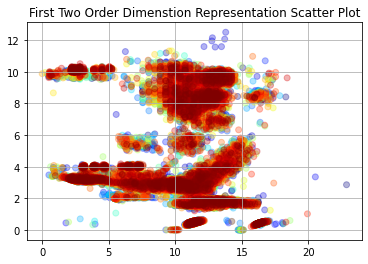

In [49]:
MAX = 66000
map_vir = plt.cm.get_cmap(name='jet')
color = map_vir(np.linspace(0, 1, MAX))
plt.scatter(reprs[:MAX, 0], reprs[:MAX, 1], color=color, alpha=0.3)
# plt.scatter(reprs[:, 0], reprs[:, 1], color='b')
plt.title('First Two Order Dimenstion Representation Scatter Plot')
plt.grid()

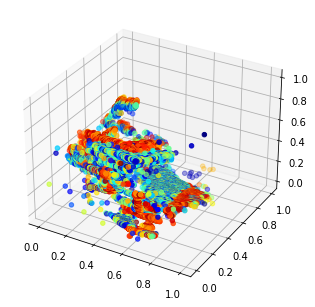

In [23]:
embedded = reprs

x_min, x_max = np.min(embedded, 0), np.max(embedded, 0)
embedded = embedded / (x_max - x_min)

# plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(embedded[:, 0], embedded[:, 1], embedded[:, 2], color=color)

plt.show()

In [24]:
# embedded = TSNE(n_components=3).fit_transform(reprs)

# x_min, x_max = np.min(embedded, 0), np.max(embedded, 0)
# embedded = embedded / (x_max - x_min)

# # plot
# fig = plt.figure()
# ax = Axes3D(fig)

# ax.scatter(embedded[:, 0], embedded[:, 1], embedded[:, 2])

# plt.axis('off')
# plt.show()

## Explaination

In [25]:
from tabnet.core import ModelConverter

tabnet_classifier._model = ModelConverter.to_inference(
    tabnet_classifier._model, tabnet_classifier._model_configs, 'cuda'
)

In [26]:
importance, masks = tabnet_classifier.explain(training_data)

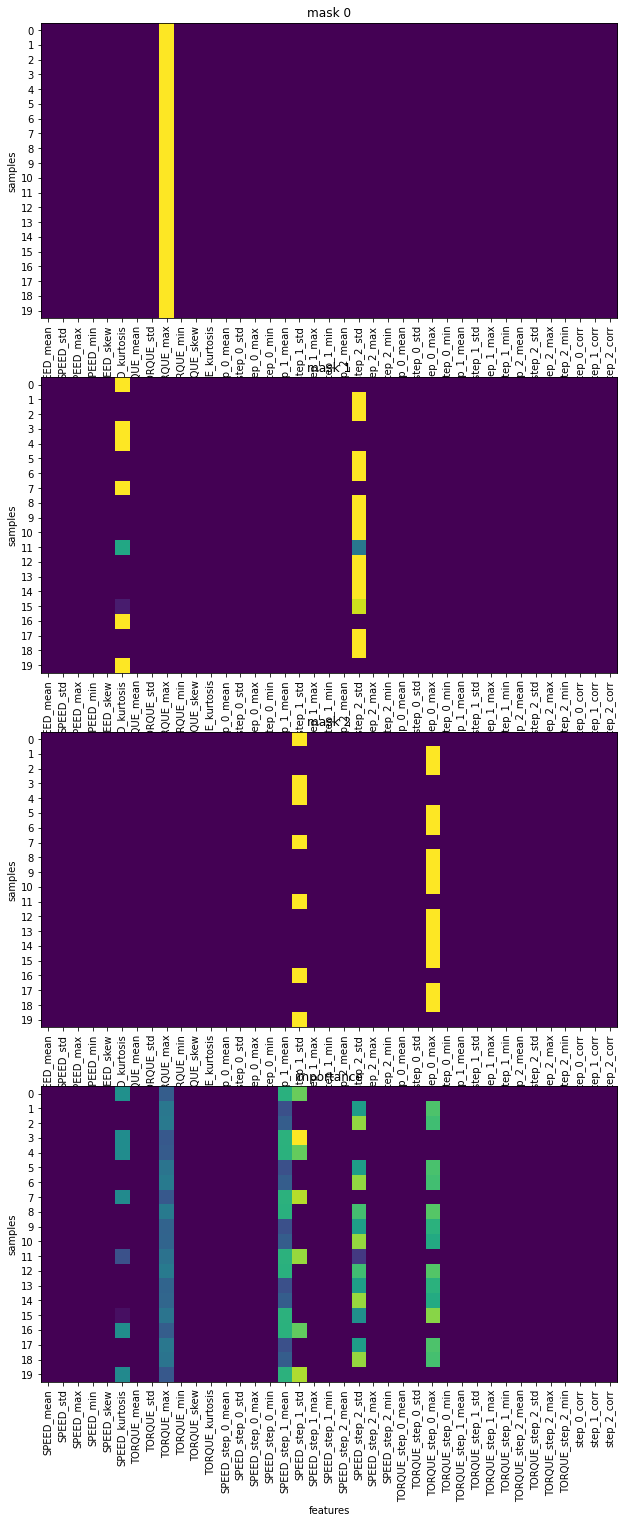

In [27]:
feature_names = training_data.columns.tolist()

fig, axs = plt.subplots(4, 1, figsize=(25,25))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
    axs[i].set_xticks(range(39))
    axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(39))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()